# <font color = "orange"><b>Adidas Sales Analysis</b></font>

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
# Reading the Excel file
df = pd.read_excel("Adidas US Sales Datasets.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [126]:
# Dropping the first 3 rows and the first column, because they are not needed
df.drop(df.index[:3], inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [127]:
# First row contains the column names
df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)
df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [128]:
# Reseting the index
df.reset_index(drop=True, inplace=True)

In [129]:
# Renaming the columns and the index
df.rename_axis('header', axis=1, inplace=True)
df.rename_axis('index', axis=0, inplace=True)

In [130]:
df

header,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
index,,,,,,,,,,,,,
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet


## <b>Data Preprocessing</b>

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


This is a green flag, dataset doesn't contain any null values.

But each column is of object type, which isn't correct, so we have to perform typecasting here.

In [132]:
# df

In [133]:
# Changing the data types of the columns

# Retailer ID and Units Sold should be integers
df['Retailer ID'] = df['Retailer ID'].astype('int64')
df['Units Sold'] = df['Units Sold'].astype('int64')

# Price per Unit, Total Sales and Operating Profit should be floats
df['Price per Unit'] = df['Price per Unit'].astype('float64')
df['Total Sales'] = df['Total Sales'].astype('float64')
df['Operating Profit'] = df['Operating Profit'].astype('float64')
df['Operating Margin'] = df['Operating Margin'].astype('float64')

# Converting the 'Invoice Date' column to datetime and removing the time
df['Invoice Date'] = pd.to_datetime(df['Invoice Date']).dt.date

df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [134]:
df

header,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
index,,,,,,,,,,,,,
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet


In [135]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [136]:
# Getting the statistical summary of the data
df.describe()

header,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


In [137]:
# Checking the column names, to see if there are any leading or trailing whitespaces
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name='header')

In [138]:
# Checking if there are any missing values
# df.isnull().sum()

In [139]:
# Creating a new column for the year, month and day
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month
df['Day'] = df['Invoice Date'].dt.day

In [140]:
# Sampling random 5 rows to check if the new columns are created
df.sample(5)

header,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Day
index,,,,,,,,,,,,,,,,
454,Foot Locker,1185732,2021-11-17,Northeast,Pennsylvania,Philadelphia,Women's Street Footwear,55.0,150,82500.0,28875.00,0.35,Outlet,2021,11,17
7201,West Gear,1185732,2021-02-22,Northeast,Maryland,Baltimore,Men's Apparel,41.0,31,1271.0,571.95,0.45,Online,2021,2,22
3231,West Gear,1185732,2021-01-17,Midwest,Indiana,Indianapolis,Men's Street Footwear,35.0,500,175000.0,70000.00,0.40,In-store,2021,1,17
8491,West Gear,1185732,2021-01-12,Southeast,Florida,Orlando,Men's Apparel,36.0,193,6948.0,2848.68,0.41,Outlet,2021,1,12
7515,Foot Locker,1185732,2021-07-06,Northeast,Rhode Island,Providence,Men's Street Footwear,46.0,167,7682.0,3456.90,0.45,Online,2021,7,6


In [141]:
# Creating a new column for the day of the week
df['Day of the Week'] = df['Invoice Date'].dt.day_name()

In [142]:
# df

In [143]:
# Adding Quarter column for the quarter of the year
df['Quarter'] = df['Invoice Date'].dt.quarter

df

header,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Day,Day of the Week,Quarter
index,,,,,,,,,,,,,,,,,,
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store,2020,1,1,Wednesday,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store,2020,1,2,Thursday,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store,2020,1,3,Friday,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store,2020,1,4,Saturday,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store,2020,1,5,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet,2021,1,24,Sunday,1
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet,2021,1,24,Sunday,1
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet,2021,2,22,Monday,1


In [144]:
df.Quarter.value_counts()

Quarter
3    2451
1    2439
2    2390
4    2368
Name: count, dtype: int64

In [145]:
df['Retailer ID'].value_counts()

Retailer ID
1185732    5265
1128299    2370
1197831    1653
1189833     360
Name: count, dtype: int64

In [146]:
df['Retailer'].value_counts()

Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

In [147]:
# check which retailer id is associated with which retailer
df.groupby(['Retailer ID', 'Retailer']).size()

Retailer ID  Retailer     
1128299      Foot Locker       515
             Kohl's            216
             Sports Direct     281
             Walmart           194
             West Gear        1164
1185732      Amazon            949
             Foot Locker      2018
             Kohl's            288
             Sports Direct     962
             Walmart           132
             West Gear         916
1189833      Kohl's            360
1197831      Foot Locker       104
             Kohl's            166
             Sports Direct     789
             Walmart           300
             West Gear         294
dtype: int64

In [148]:
# In our dataset Retailer ID is not correct, so we will be assigning the correct Retailer ID to each retailer

# Assigning the correct Retailer ID to each retailer
df.loc[df['Retailer'] == 'Foot Locker', 'Retailer ID'] = 1
df.loc[df['Retailer'] == "Kohl's", "Retailer ID"] = 2
df.loc[df['Retailer'] == 'Sports Direct', 'Retailer ID'] = 3
df.loc[df['Retailer'] == 'Walmart', 'Retailer ID'] = 4
df.loc[df['Retailer'] == 'West Gear', 'Retailer ID'] = 5
df.loc[df['Retailer'] == 'Amazon', 'Retailer ID'] = 6

In [149]:
# check which retailer id is associated with which retailer
df.groupby(['Retailer ID', 'Retailer']).size()

Retailer ID  Retailer     
1            Foot Locker      2637
2            Kohl's           1030
3            Sports Direct    2032
4            Walmart           626
5            West Gear        2374
6            Amazon            949
dtype: int64

In [150]:
df['Retailer ID'].value_counts()

Retailer ID
1    2637
5    2374
3    2032
2    1030
6     949
4     626
Name: count, dtype: int64

In [151]:
df

header,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Day,Day of the Week,Quarter
index,,,,,,,,,,,,,,,,,,
0,Foot Locker,1,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store,2020,1,1,Wednesday,1
1,Foot Locker,1,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store,2020,1,2,Thursday,1
2,Foot Locker,1,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store,2020,1,3,Friday,1
3,Foot Locker,1,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store,2020,1,4,Saturday,1
4,Foot Locker,1,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store,2020,1,5,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet,2021,1,24,Sunday,1
9644,Foot Locker,1,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet,2021,1,24,Sunday,1
9645,Foot Locker,1,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet,2021,2,22,Monday,1


## <b>Data Visualization</b>

### <b>Total Sales by:</b>

In [152]:
# Total sales by retailer
total_sales_by_retailer = df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)
total_sales_by_retailer

Retailer
West Gear        242964333.0
Foot Locker      220094720.0
Sports Direct    182470997.0
Kohl's           102114753.0
Amazon            77698912.0
Walmart           74558410.0
Name: Total Sales, dtype: float64

([0], [Text(0, 0, '')])

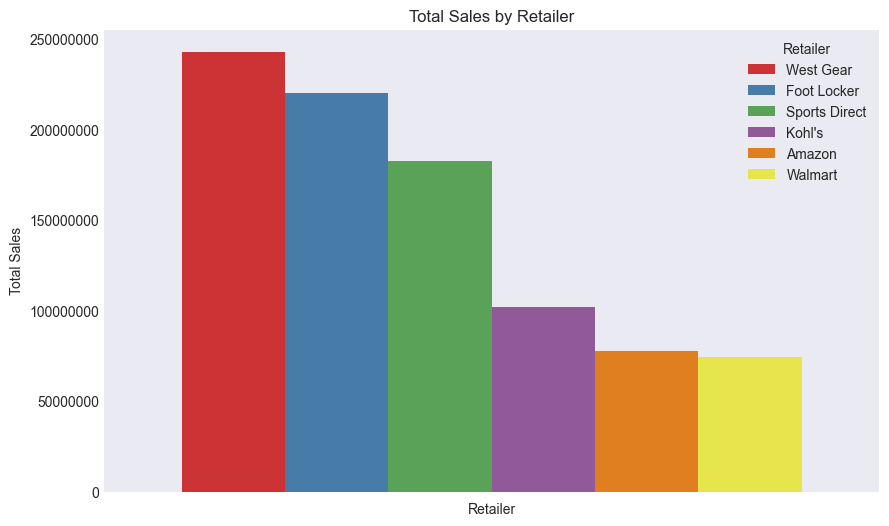

In [153]:
plt.figure(figsize=(10, 6))
# sns.barplot(x=total_sales_by_retailer.index, hue=total_sales_by_retailer.index, y=total_sales_by_retailer.values, palette='Set1')
sns.barplot(hue=total_sales_by_retailer.index, y=total_sales_by_retailer.values, palette='Set1')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Sales by Retailer')
plt.ylabel('Total Sales')
plt.xlabel('Retailer')
plt.xticks(rotation=0)

In [154]:
# Total sales by Region
total_sales_by_region = df.groupby('Region')['Total Sales'].sum().sort_values(ascending = False)
total_sales_by_region

Region
West         269943182.0
Northeast    186324067.0
Southeast    163171236.0
South        144663181.0
Midwest      135800459.0
Name: Total Sales, dtype: float64

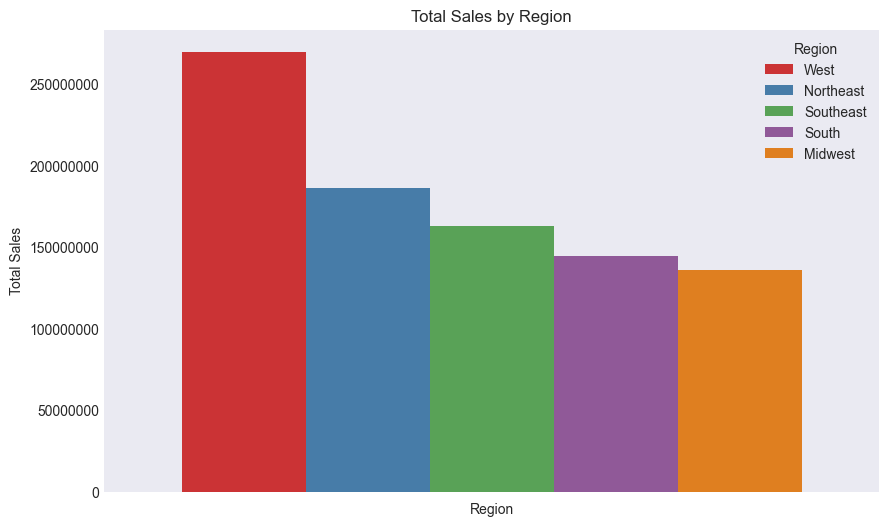

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(hue=total_sales_by_region.index, y=total_sales_by_region.values, palette='Set1')
plt.ticklabel_format(style = 'plain', axis='y')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()

In [156]:
# NUMBER OF STATES IN EACH REGION
df.groupby('Region')['State'].nunique()

Region
Midwest      13
Northeast    12
South         7
Southeast     6
West         12
Name: State, dtype: int64

In [157]:
# NUMBER OF CITIES IN EACH STATE
df.groupby('State')['City'].nunique()

State
Alabama           1
Alaska            1
Arizona           1
Arkansas          1
California        2
Colorado          1
Connecticut       1
Delaware          1
Florida           2
Georgia           1
Hawaii            1
Idaho             1
Illinois          1
Indiana           1
Iowa              1
Kansas            1
Kentucky          1
Louisiana         1
Maine             1
Maryland          1
Massachusetts     1
Michigan          1
Minnesota         1
Mississippi       1
Missouri          1
Montana           1
Nebraska          1
Nevada            1
New Hampshire     1
New Jersey        1
New Mexico        1
New York          2
North Carolina    1
North Dakota      1
Ohio              1
Oklahoma          1
Oregon            1
Pennsylvania      1
Rhode Island      1
South Carolina    1
South Dakota      1
Tennessee         1
Texas             2
Utah              1
Vermont           1
Virginia          1
Washington        1
West Virginia     1
Wisconsin         1
Wyoming       

In [158]:
# Defining a function which will plot the bar graph of total sales by State and City for a given region
def plot_total_sales_by_state_and_city(region):
    total_sales_by_state = df[df['Region'] == region].groupby('State')['Total Sales'].sum().sort_values(ascending=False)
    total_sales_by_city = df[df['Region'] == region].groupby('City')['Total Sales'].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    
    sns.barplot(hue = total_sales_by_state.index, y = total_sales_by_state.values, palette='Set1')
    plt.ticklabel_format(style='plain', axis='y')
    plt.title(f'Total Sales by State in {region}')
    plt.ylabel('Total Sales')
    plt.xlabel('State')
    plt.xticks(rotation=0)
    
    plt.subplot(1, 2, 2)
    sns.barplot(hue = total_sales_by_city.index, y = total_sales_by_city.values, palette='Set1')
    plt.ticklabel_format(style='plain', axis='y')
    plt.title(f'Total Sales by City in {region}')
    plt.ylabel('Total Sales')
    plt.xlabel('City')
    plt.xticks(rotation = 0)
    
    plt.show()

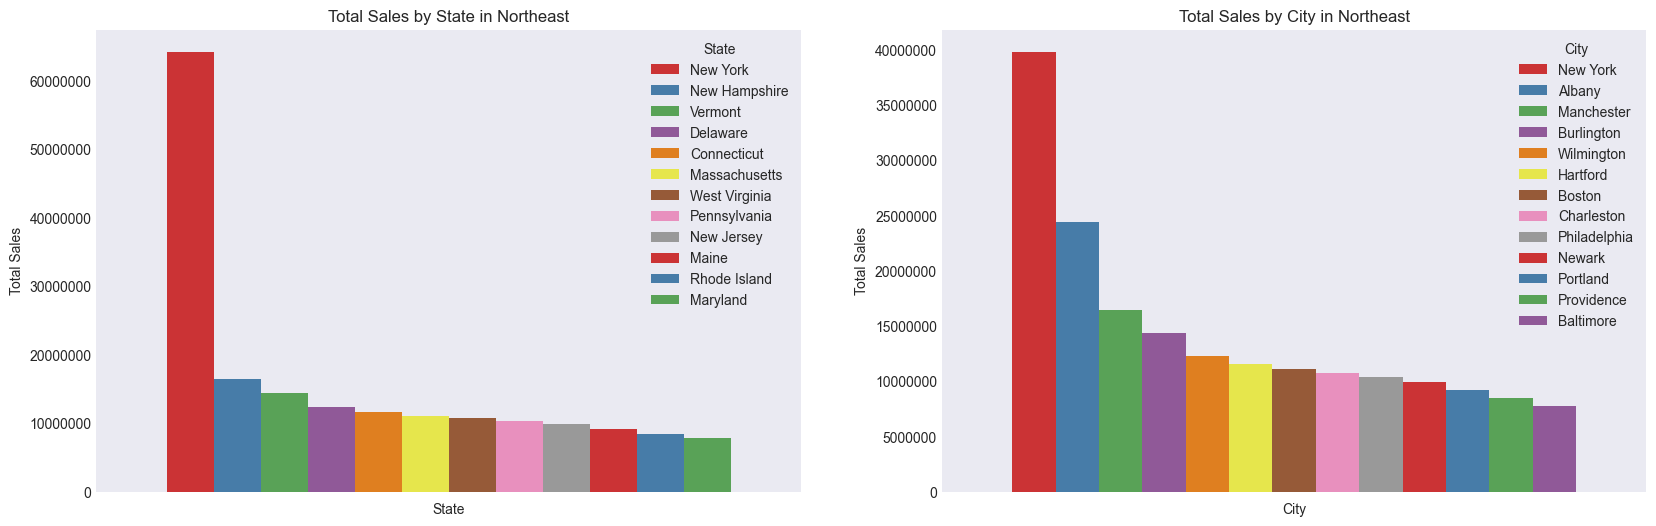

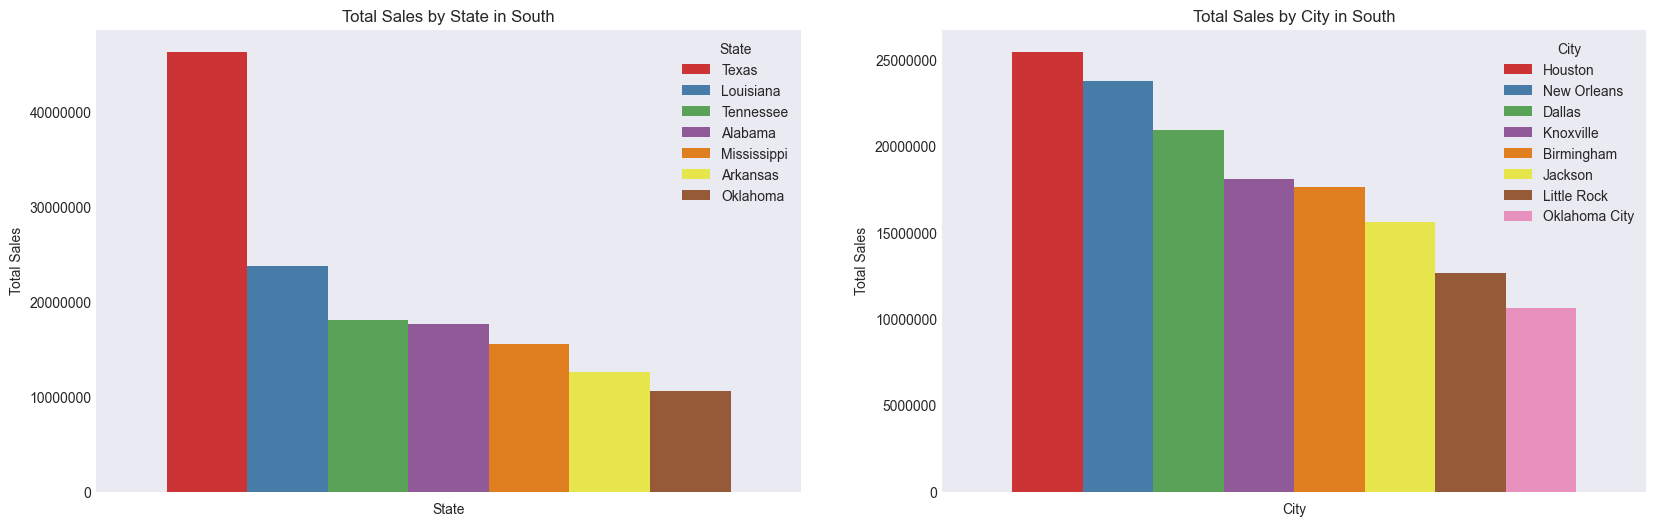

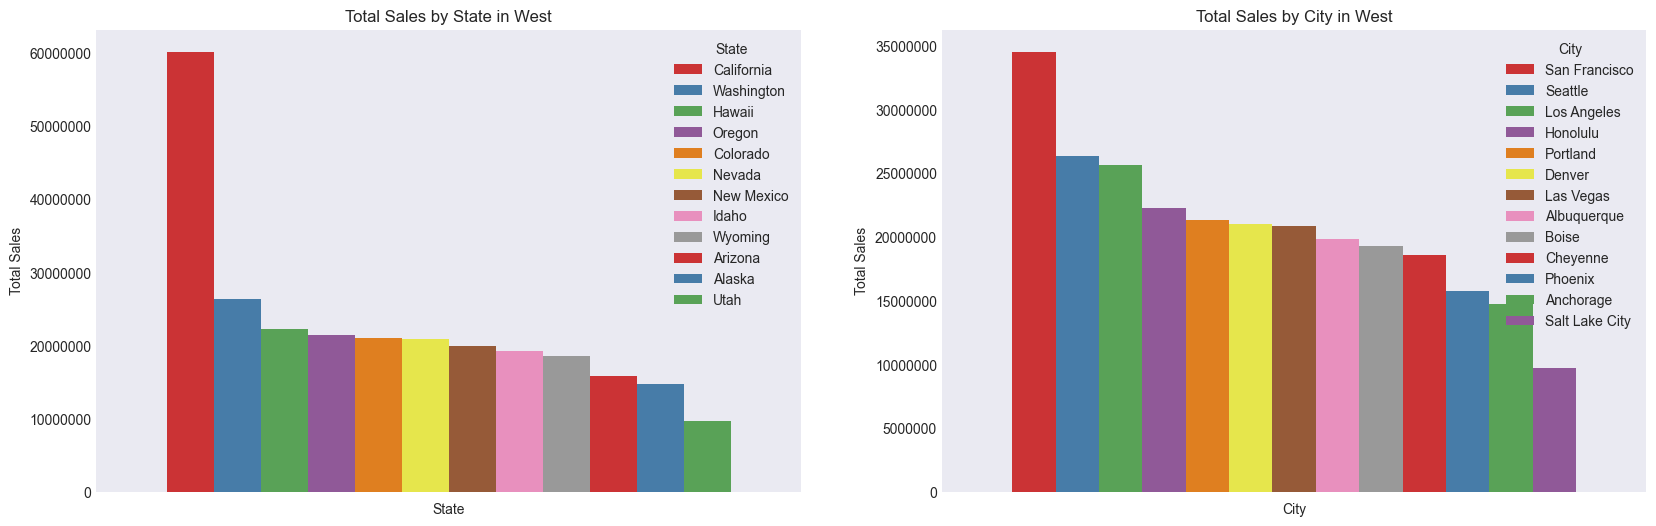

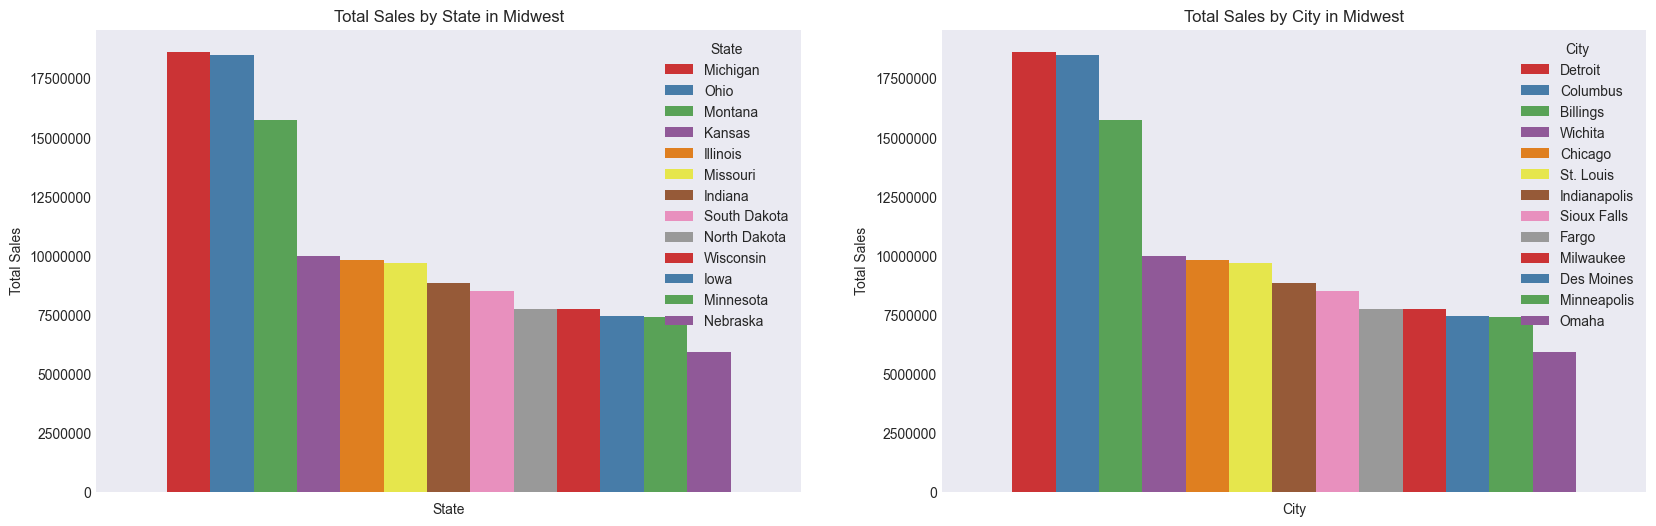

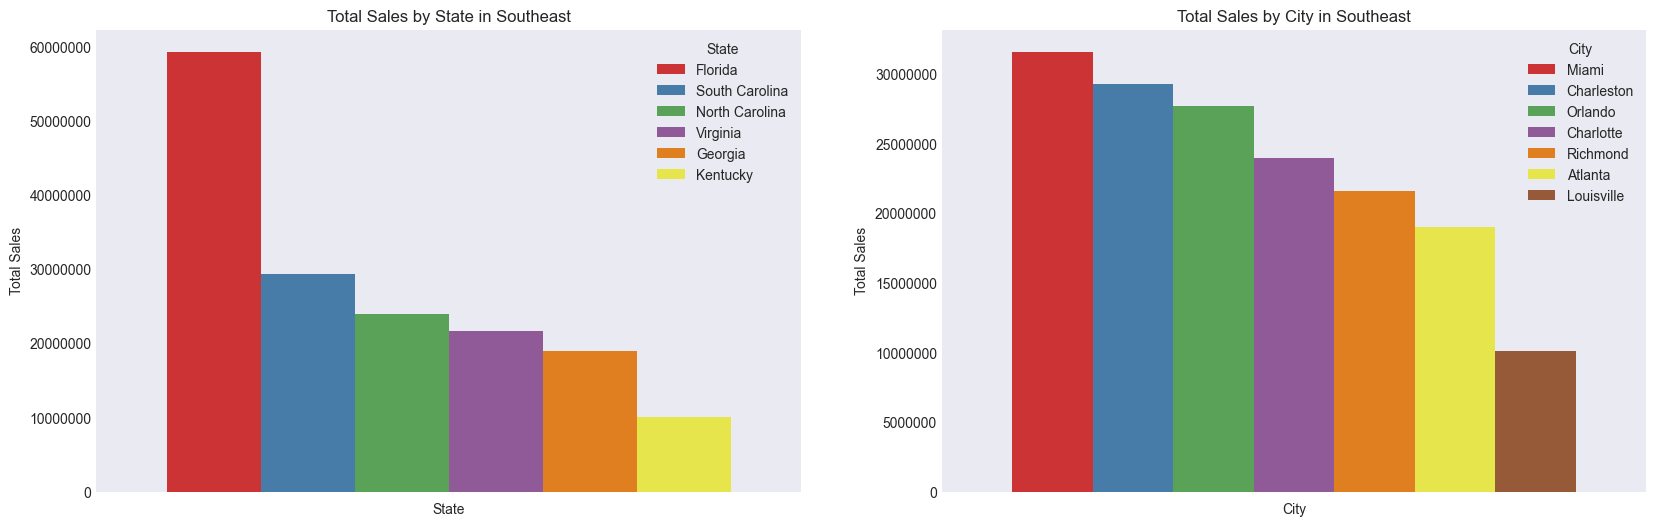

In [159]:
regions = df['Region'].unique()

for region in regions:
    plot_total_sales_by_state_and_city(region)

### <b>Sales Trend over time</b>

In [160]:
# Sales trend by month
total_sales_by_month = df.groupby('Month')['Total Sales'].sum()
total_sales_by_month

Month
1     71479142.0
2     61100153.0
3     56809109.0
4     72339970.0
5     80507695.0
6     74747372.0
7     95480694.0
8     92166201.0
9     77661459.0
10    63911033.0
11    67857340.0
12    85841957.0
Name: Total Sales, dtype: float64

In [161]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [162]:
plt.style.use('seaborn-v0_8-dark')

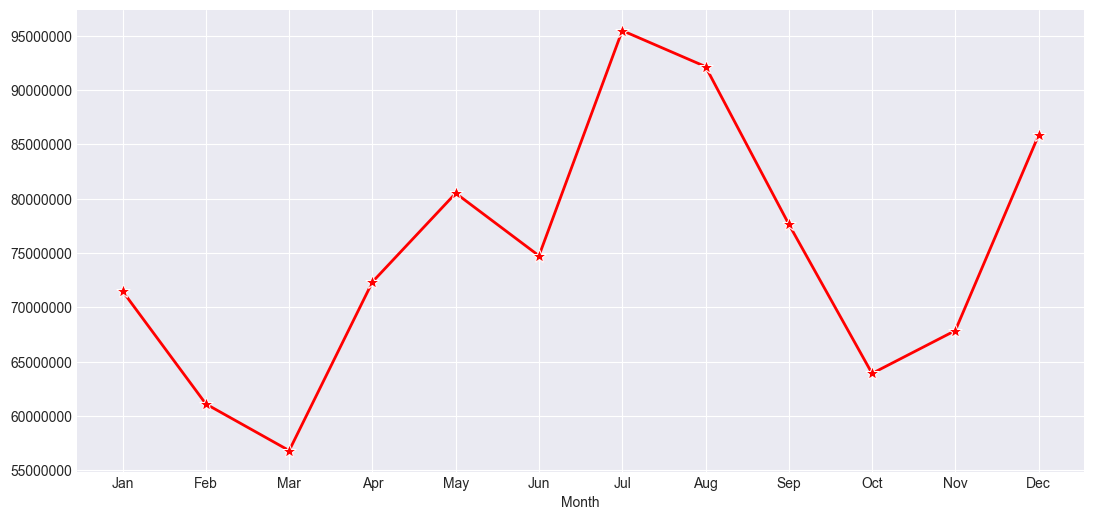

In [163]:
plt.figure(figsize=(13, 6))
sns.lineplot(x=total_sales_by_month.index, y=total_sales_by_month.values, marker='*', markersize=10, color='red', linewidth=2)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ticks=range(1, 13))
plt.grid(True)

In [164]:
# Sales Trend by Quarter
total_sales_by_quarter = df.groupby('Quarter')['Total Sales'].sum()
total_sales_by_quarter

Quarter
1    189388404.0
2    227595037.0
3    265308354.0
4    217610330.0
Name: Total Sales, dtype: float64

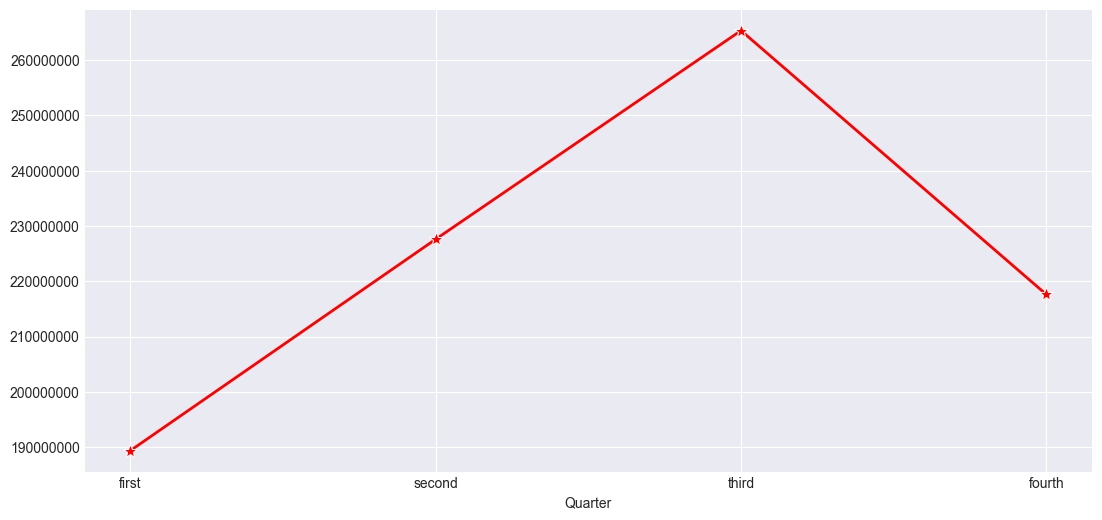

In [165]:
plt.figure(figsize=(13, 6))
sns.lineplot(x=total_sales_by_quarter.index, y=total_sales_by_quarter.values, marker='*', markersize=10, color='red', linewidth=2)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(labels=['first', 'second', 'third', 'fourth'], ticks=range(1, 5))
plt.grid(True)

In [166]:
df['Year'] = df['Invoice Date'].dt.year

In [167]:
# total_sales_by_month_year.index.get_level_values(0)

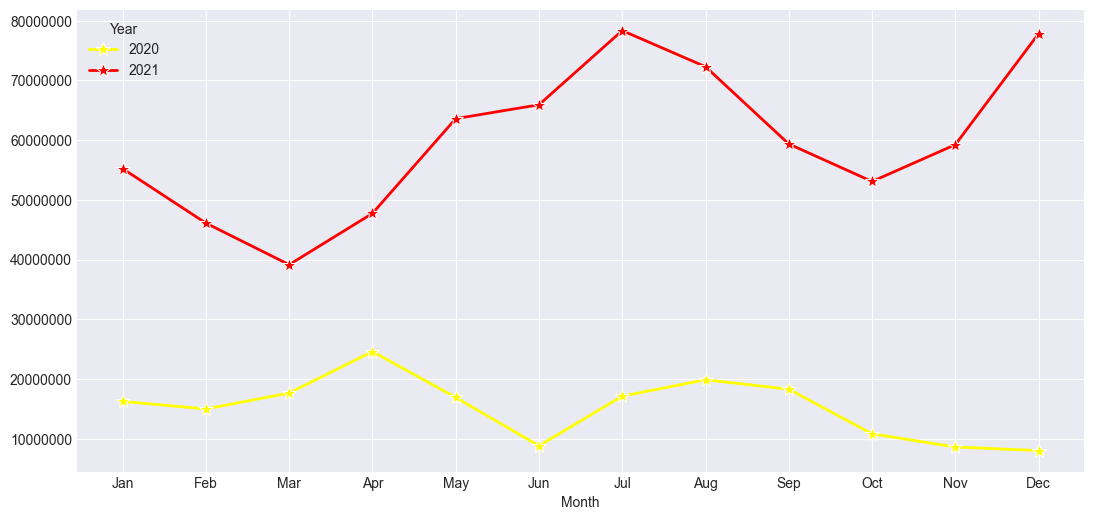

In [168]:
# Sales trend in both years 2020 and 2021
total_sales_by_month_year = df.groupby(['Year', 'Month'])['Total Sales'].sum()

plt.figure(figsize=(13, 6))
sns.lineplot(x=total_sales_by_month_year.index.get_level_values(1), 
            y=total_sales_by_month_year.values, 
            hue=total_sales_by_month_year.index.get_level_values(0), 
            marker='*', 
            markersize=10, 
            linewidth=2, 
            palette=['yellow', 'red']
)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ticks=range(1, 13))
plt.grid(True)

In [169]:
# Top 5 retailers by total sales
top_5_retailers = df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False).head(5)
top_5_retailers

Retailer
West Gear        242964333.0
Foot Locker      220094720.0
Sports Direct    182470997.0
Kohl's           102114753.0
Amazon            77698912.0
Name: Total Sales, dtype: float64

In [170]:
# Top performing products by total sales
top_5_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(5)
top_5_products

Product
Men's Street Footwear      208826244.0
Women's Apparel            179038860.0
Men's Athletic Footwear    153673680.0
Women's Street Footwear    128002813.0
Men's Apparel              123728632.0
Name: Total Sales, dtype: float64

Text(0.5, 0, 'Product')

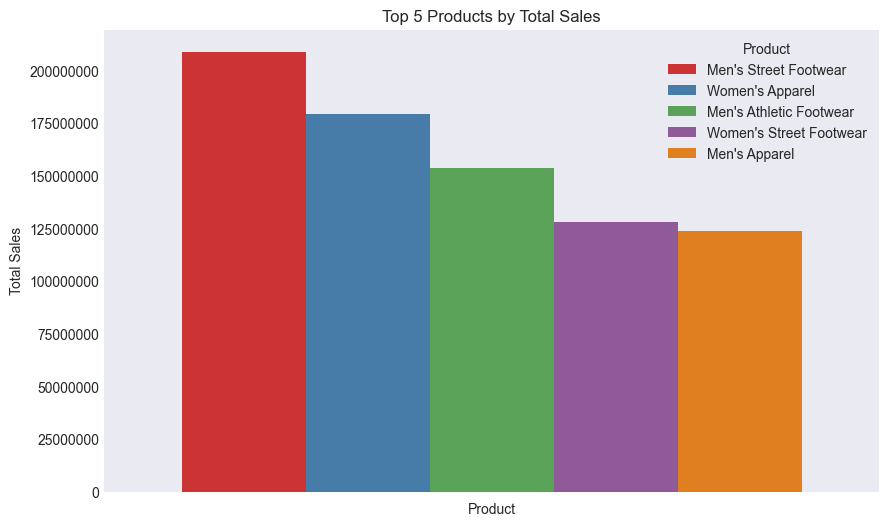

In [171]:
plt.figure(figsize=(10, 6))
sns.barplot(hue=top_5_products.index, y=top_5_products.values, palette='Set1')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Top 5 Products by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product')

Top Performing products are :
1. Men's Street footwear
2. Women's Apparel
3. Men's Athletic Footwear
4. Women's Street Footwear
5. Men's Apparel

In [172]:
# Top performing products with highest operating margin
top_5_products_operating_margin = df.groupby('Product')['Operating Margin'].mean().sort_values(ascending=False)
top_5_products_operating_margin

Product
Men's Street Footwear        0.446130
Women's Apparel              0.441318
Women's Athletic Footwear    0.424359
Men's Apparel                0.413225
Women's Street Footwear      0.410199
Men's Athletic Footwear      0.402702
Name: Operating Margin, dtype: float64

The margin for each product is approx same.

In [173]:
# Top performing products with highest operating profit
top_5_products_operating_profit = df.groupby('Product')['Operating Profit'].mean().sort_values(ascending=False)
top_5_products_operating_profit

Product
Men's Street Footwear        51429.975540
Women's Apparel              42693.389652
Men's Athletic Footwear      32203.036143
Women's Street Footwear      28044.668414
Men's Apparel                27872.372559
Women's Athletic Footwear    24268.857372
Name: Operating Profit, dtype: float64

Text(0.5, 0, 'Product')

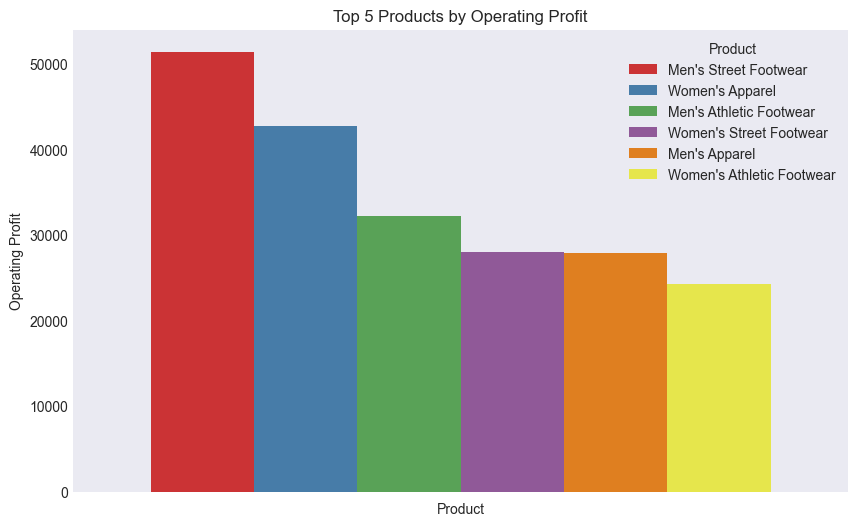

In [174]:
plt.figure(figsize=(10, 6))
sns.barplot(hue=top_5_products_operating_profit.index, y=top_5_products_operating_profit.values, palette='Set1')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Top 5 Products by Operating Profit')
plt.ylabel('Operating Profit')
plt.xlabel('Product')

In [175]:
# Top Retailers by total sales, units sold, and profit contribution.

# Top retailers by total sales
top_retailers_by_total_sales = df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)
top_retailers_by_total_sales

Retailer
West Gear        242964333.0
Foot Locker      220094720.0
Sports Direct    182470997.0
Kohl's           102114753.0
Amazon            77698912.0
Walmart           74558410.0
Name: Total Sales, dtype: float64

In [176]:
# Top retailers by units sold
top_retailers_by_units_sold = df.groupby('Retailer')['Units Sold'].sum().sort_values(ascending=False)
top_retailers_by_units_sold

Retailer
West Gear        625262
Foot Locker      604369
Sports Direct    557640
Kohl's           287375
Walmart          206225
Amazon           197990
Name: Units Sold, dtype: int64

In [177]:
# Top retailers by operating profit
top_retailers_by_operating_profit = df.groupby('Retailer')['Operating Profit'].mean().sort_values(ascending=False)
top_retailers_by_operating_profit

Retailer
Walmart          41185.387556
Sports Direct    36581.178622
West Gear        36085.877498
Kohl's           35739.080175
Foot Locker      30611.348051
Amazon           30367.232150
Name: Operating Profit, dtype: float64

### Finding out which method generates the most sales and profit (online or in-store)

In [178]:
total_sales_by_method = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False)
total_sales_by_method

Sales Method
In-store    356643750.0
Outlet      295585493.0
Online      247672882.0
Name: Total Sales, dtype: float64

In [179]:
total_sales_by_method_df = pd.DataFrame({'Total sales' : total_sales_by_method.values, 
                                         '%': (total_sales_by_method.values/total_sales_by_method.sum())*100}, 
                                        index = total_sales_by_method.index
)

total_sales_by_method_df

,Total sales,%
Sales Method,,
In-store,356643750.0,39.631393
Outlet,295585493.0,32.846405
Online,247672882.0,27.522202


Text(0.5, 1.0, 'Total Sales by Sales Method')

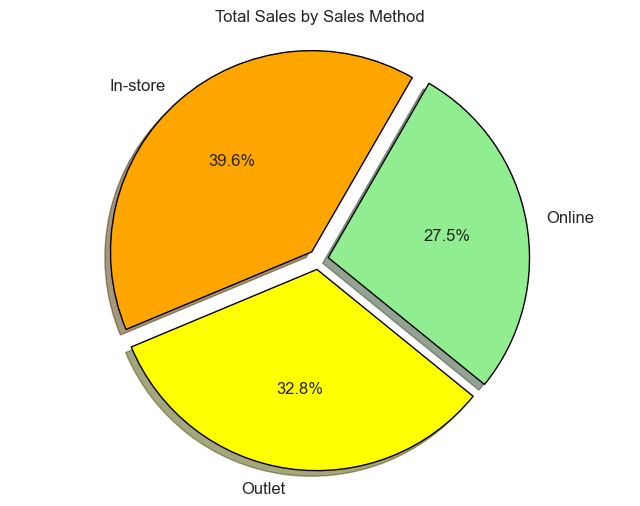

In [180]:
# sns.barplot(hue=total_sales_by_method.index, y=total_sales_by_method.values, palette='Set1')
# plt.ticklabel_format(style='plain', axis='y')
# plt.title('Total Sales by Sales Method')
# plt.ylabel('Total Sales')
# plt.xlabel('Sales Method')

# Creating pie chart for total sales by sales method
plt.figure(figsize=(8, 6))
plt.pie(total_sales_by_method_df['Total sales'], 
        labels=total_sales_by_method_df.index, 
        autopct='%1.1f%%', 
        startangle=60, 
        shadow=True, 
        colors=['orange', 'yellow', 'lightgreen'],
        explode=(0.05, 0.05, 0.05),
        textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'k'},
        center=(0, 1)
)
plt.axis('equal')
plt.title('Total Sales by Sales Method')

In-store and Outlet generates more than 71% of the total sales (means Offline). While online method only contribute to 27.5% in total sales. 

In [181]:
total_profit_by_method = df.groupby('Sales Method')['Operating Profit'].sum().sort_values(ascending=False)
total_profit_by_method

Sales Method
In-store    1.275913e+08
Outlet      1.079883e+08
Online      9.655518e+07
Name: Operating Profit, dtype: float64

In [182]:
total_profit_by_method_df = pd.DataFrame({
    'Total Profit' : total_profit_by_method.values, 
    '%': (total_profit_by_method.values/total_profit_by_method.sum())*100
    }, 
    index = total_profit_by_method.index
)

total_profit_by_method_df

,Total Profit,%
Sales Method,,
In-store,1.275913e+08,38.415518
Outlet,1.079883e+08,32.513398
Online,9.655518e+07,29.071084


Text(0.5, 1.0, 'Total Profit by Sales Method')

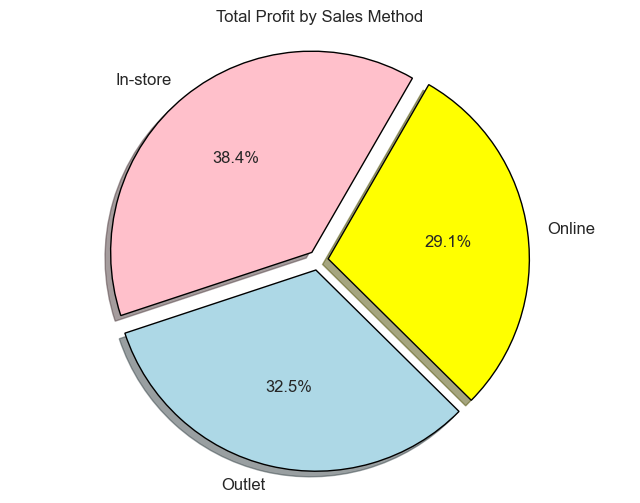

In [183]:
plt.figure(figsize=(8, 6))

plt.pie(total_profit_by_method_df['Total Profit'], 
        labels=total_profit_by_method_df.index, 
        autopct='%1.1f%%', 
        startangle=60, 
        shadow=True, 
        colors=['pink', 'lightblue', 'yellow'],
        explode=(0.05, 0.05, 0.05),
        textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'k'},
        center=(0, 1)
)

plt.axis('equal')
plt.title('Total Profit by Sales Method')

In [184]:
# Operating Profit by Region
operating_profit_by_region = df.groupby('Region')['Operating Profit'].sum().sort_values(ascending=False)
operating_profit_by_region

Region
West         89609406.55
Northeast    68020587.65
South        61138004.07
Southeast    60555416.70
Midwest      52811346.48
Name: Operating Profit, dtype: float64

In [185]:
operating_profit_by_region_df = pd.DataFrame({
    'Operating Profit': operating_profit_by_region.values, 
    '%': (operating_profit_by_region.values/operating_profit_by_region.sum())*100}, 
    index = operating_profit_by_region.index
)

operating_profit_by_region_df

,Operating Profit,%
Region,,
West,89609406.55,26.979834
Northeast,68020587.65,20.479816
South,61138004.07,18.407590
Southeast,60555416.70,18.232183
Midwest,52811346.48,15.900578


In [186]:
# palettes = sns.palettes.SEABORN_PALETTES
# print(palettes)

Text(0.5, 1.0, 'Operating Profit by Region')

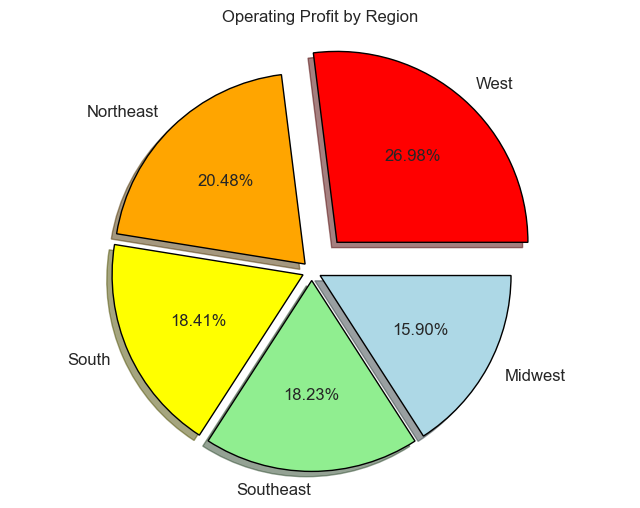

In [187]:
plt.figure(figsize=(8, 6))

plt.pie(operating_profit_by_region_df['Operating Profit'], 
        labels=operating_profit_by_region_df.index, 
        autopct='%1.2f%%', 
        startangle=0, 
        shadow=True, 
        colors=['red', 'orange', 'yellow', 'lightgreen', 'lightblue'],
        explode=(0.2, 0.05, 0.05, 0.05, 0.05),
        textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'k'},
        center=(0, 1)
)

plt.axis('equal')
plt.title('Operating Profit by Region')

In [188]:
# Group by Region, State, and City to calculate the total Operating Profit
profit_by_region = df.groupby('Region')['Operating Profit'].sum().reset_index().sort_values(by='Operating Profit', ascending=False)
profit_by_state = df.groupby('State')['Operating Profit'].sum().reset_index().sort_values(by='Operating Profit', ascending=False)
profit_by_city = df.groupby('City')['Operating Profit'].sum().reset_index().sort_values(by='Operating Profit', ascending=False)

In [189]:
profit_by_region

,Region,Operating Profit
4,West,89609406.55
1,Northeast,68020587.65
2,South,61138004.07
3,Southeast,60555416.70
0,Midwest,52811346.48


Text(0, 0.5, 'Region')

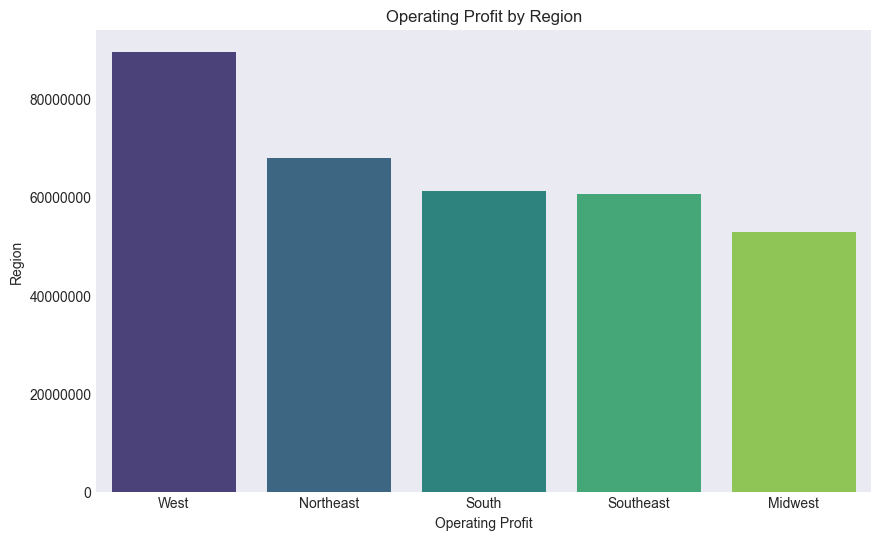

In [190]:
# Plot Operating Profit by Region
plt.figure(figsize=(10, 6))
sns.barplot(hue = profit_by_region['Region'], x = profit_by_region['Region'], y = profit_by_region['Operating Profit'], palette='viridis')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Operating Profit by Region')
plt.xlabel('Operating Profit')
plt.ylabel('Region')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'New York'),
  Text(1, 0, 'Florida'),
  Text(2, 0, 'California'),
  Text(3, 0, 'Texas'),
  Text(4, 0, 'South Carolina'),
  Text(5, 0, 'North Carolina'),
  Text(6, 0, 'Louisiana'),
  Text(7, 0, 'Alabama'),
  Text(8, 0, 'Tennessee'),
  Text(9, 0, 'Michigan'),
  Text(10, 0, 'Idaho'),
  Text(11, 0, 'Virginia'),
  Text(12, 0, 'Colorado'),
  Text(13, 0, 'Oregon'),
  Text(14, 0, 'Ohio'),
  Text(15, 0, 'Nevada'),
  Text(16, 0, 'Washington'),
  Text(17, 0, 'Georgia'),
  Text(18, 0, 'New Mexico'),
  Text(19, 0, 'Wyoming'),
  Text(20, 0, 'Mississippi'),
  Text(21, 0, 'Montana'),
  Text(22, 0, 'Hawaii'),
  Text(23, 0, 'New Hampshire'),
  Text(24, 0, 'Vermont'),
  Text(25, 0, 'Arizona'),
  Text(26, 0

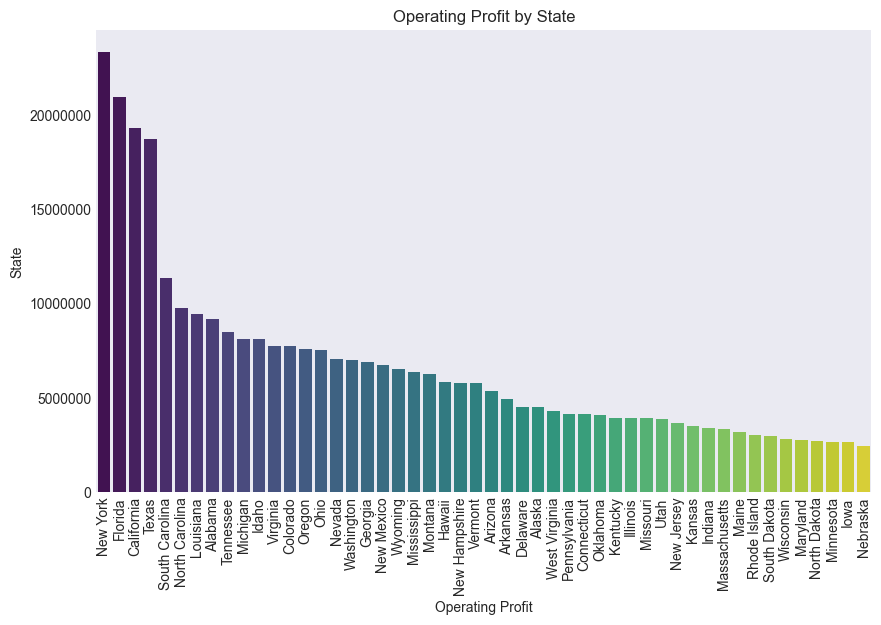

In [191]:
# Plot Operating Profit by State
plt.figure(figsize=(10, 6))
sns.barplot(hue = profit_by_state['State'], x = profit_by_state['State'], y = profit_by_state['Operating Profit'], palette='viridis')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Operating Profit by State')
plt.xlabel('Operating Profit')
plt.ylabel('State')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, 'Charleston'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Miami'),
  Text(3, 0, 'Portland'),
  Text(4, 0, 'San Francisco'),
  Text(5, 0, 'Houston'),
  Text(6, 0, 'Charlotte'),
  Text(7, 0, 'Albany'),
  Text(8, 0, 'New Orleans'),
  Text(9, 0, 'Birmingham'),
  Text(10, 0, 'Los Angeles'),
  Text(11, 0, 'Dallas'),
  Text(12, 0, 'Orlando'),
  Text(13, 0, 'Knoxville'),
  Text(14, 0, 'Detroit'),
  Text(15, 0, 'Boise'),
  Text(16, 0, 'Richmond'),
  Text(17, 0, 'Denver'),
  Text(18, 0, 'Columbus'),
  Text(19, 0, 'Las Vegas'),
  Text(20, 0, 'Seattle'),
  Text(21, 0, 'Atlanta'),
  Text(22, 0, 'Albuquerque'),
  Text(23, 0, 'Cheyenne'),
  Text(24, 0, 'Jackson'),
  Text(25, 0, 'Billings'),
  

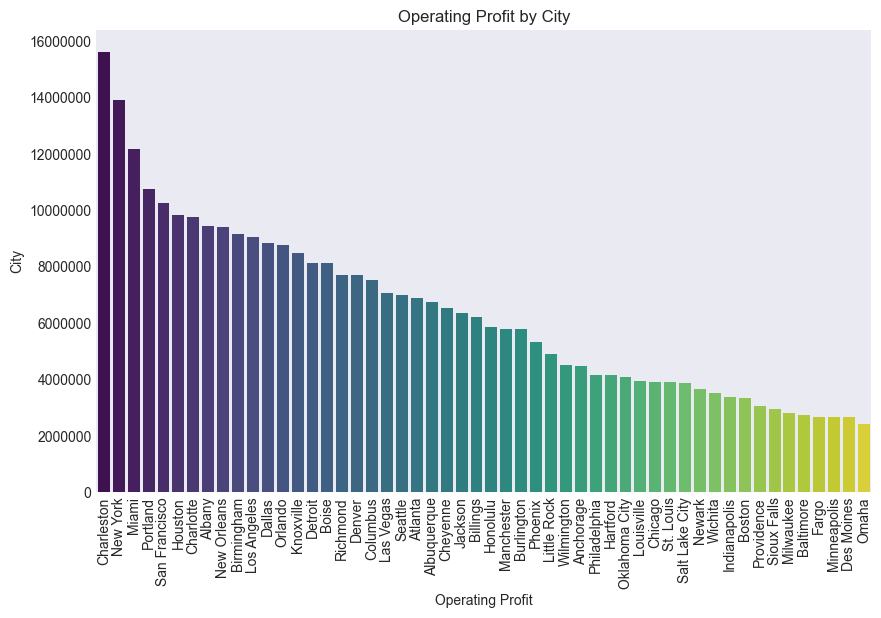

In [192]:
# Plot Operating Profit by City
plt.figure(figsize=(10, 6))
sns.barplot(hue = profit_by_city['City'], x = profit_by_city['City'], y = profit_by_city['Operating Profit'], palette='viridis')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Operating Profit by City')
plt.xlabel('Operating Profit')
plt.ylabel('City')
plt.xticks(rotation=90)

In [193]:
# Defining function to plot the Heatmap of Operating Profit by 

def plot_heatmap(index, columns, values, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.pivot_table(index=index, columns=columns, values=values, aggfunc='sum'), cmap='viridis', annot=True, fmt='.2f')
    plt.title(title)
    plt.show()

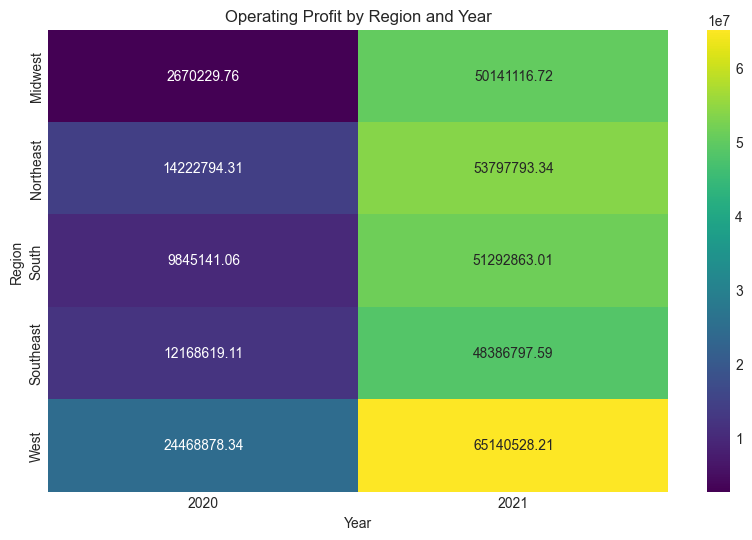

In [194]:
plot_heatmap('Region', 'Year', 'Operating Profit', 'Operating Profit by Region and Year')

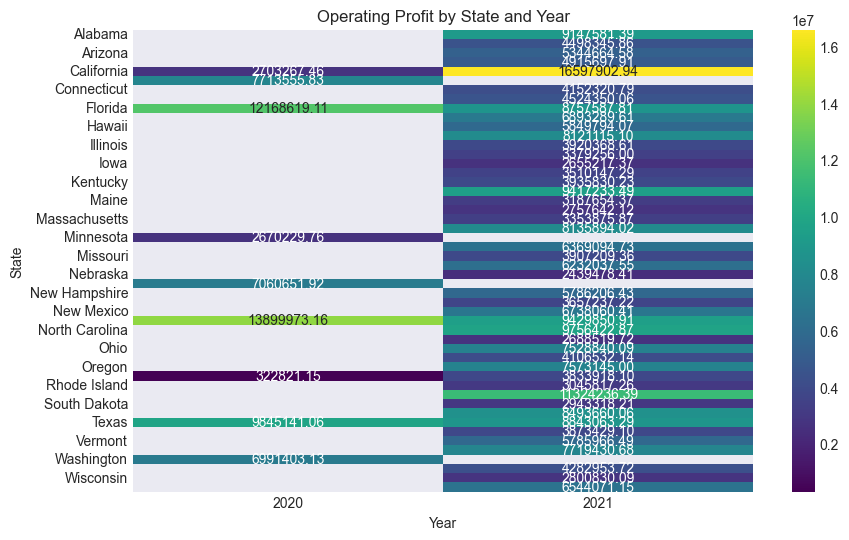

In [195]:
plot_heatmap('State', 'Year', 'Operating Profit', 'Operating Profit by State and Year')

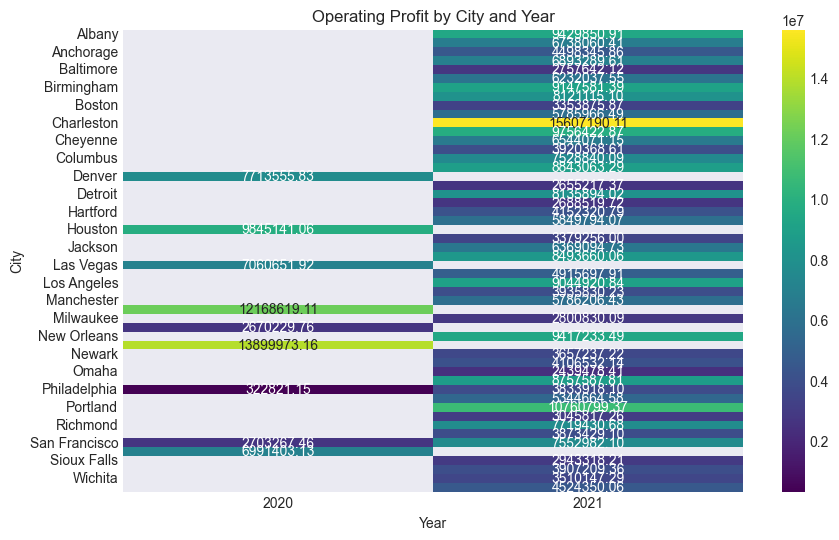

In [196]:
plot_heatmap('City', 'Year', 'Operating Profit', 'Operating Profit by City and Year')

In [197]:
df.to_csv('Adidas_US_Sales_Dataset_Preprocessed.csv', index=False)

In [198]:
df = pd.read_csv('Adidas_US_Sales_Dataset_Preprocessed.csv')

In [199]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'Year', 'Month',
       'Day', 'Day of the Week', 'Quarter'],
      dtype='object')

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   int64  
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
 13  Year              9648 non-null   int64  
 14  Month             9648 non-null   int64  
 15  Day               9648 non-null   int64  
 16  Day of the Week   9648 non-null   object 


In [201]:
df.groupby(['Retailer ID', 'Retailer']).size()

Retailer ID  Retailer     
1            Foot Locker      2637
2            Kohl's           1030
3            Sports Direct    2032
4            Walmart           626
5            West Gear        2374
6            Amazon            949
dtype: int64

# <font color = 'blue'><b>Creating MySQL Database</b></font>

In [202]:
import mysql.connector as connector
import config # This is the config.py file which contains the database credentials. You can create your own file and replace the values.

In [203]:
# Connecting to the MySQL server
configuration = config.mysql_credentials

def connect_to_db(configuration):
    try:
        connection = connector.connect(**configuration)
        print('Connected to the database')
        return connection
    except Exception as e:
        print('Error:', e)

### Designing the Database Schema

In [204]:
retailer_table = '''
CREATE TABLE Retailer (
    Retailer_ID INT PRIMARY KEY,
    Retailer VARCHAR(255) UNIQUE
)'''

location_table = '''
CREATE TABLE Location (
    Location_ID INT AUTO_INCREMENT PRIMARY KEY,
    Region VARCHAR(255),
    State VARCHAR(255),
    City VARCHAR(255),
    UNIQUE (Region, State, City)
)'''

# Bridge Table
retailer_location_table = '''           
CREATE TABLE Retailer_Location (
    Retailer_ID INT,
    Location_ID INT,
    PRIMARY KEY (Retailer_ID, Location_ID),
    FOREIGN KEY (Retailer_ID) REFERENCES Retailer(Retailer_ID),
    FOREIGN KEY (Location_ID) REFERENCES Location(Location_ID)
)'''

product_table = '''
CREATE TABLE Product (
    Product_ID INT AUTO_INCREMENT PRIMARY KEY,
    Product VARCHAR(255),
    Price_Per_Unit DECIMAL(10, 2)
)'''

date_table = '''
CREATE TABLE Date (
    Date_ID INT AUTO_INCREMENT PRIMARY KEY,
    Invoice_Date DATE,
    Year INT,
    Month INT,
    Day INT,
    Day_of_the_Week VARCHAR(50),
    Quarter INT,
    UNIQUE (Invoice_Date)
);'''

sales_table = '''
CREATE TABLE Sales (
    Sale_ID INT AUTO_INCREMENT PRIMARY KEY,
    Retailer_ID INT,
    Location_ID INT,
    Product_ID INT,
    Date_ID INT,
    Units_Sold INT,
    Total_Sales DECIMAL(15, 2),
    Operating_Profit DECIMAL(15, 2),
    Operating_Margin DECIMAL(5, 2),
    Sales_Method VARCHAR(255),
    FOREIGN KEY (Retailer_ID) REFERENCES Retailer(Retailer_ID),
    FOREIGN KEY (Location_ID) REFERENCES Location(Location_ID),
    FOREIGN KEY (Product_ID) REFERENCES Product(Product_ID),
    FOREIGN KEY (Date_ID) REFERENCES Date(Date_ID)
)'''

In [205]:
connection = connect_to_db(configuration)

cursor = connection.cursor()

tables = {
    'Retailer Table':retailer_table, 
    'Location Table': location_table,
    'Retailer Location Table': retailer_location_table,
    'Products Table': product_table, 
    'Date Table': date_table, 
    'Sales Table':sales_table
}

for table_name, query in tables.items():
    cursor.execute(query)
    print('Created table:', table_name)
    
connection.commit()
# cursor.close()

Connected to the database
Created table: Retailer Table
Created table: Location Table
Created table: Retailer Location Table
Created table: Products Table
Created table: Date Table
Created table: Sales Table


In [206]:
# Connecting to the MySQL server
connection = connect_to_db(configuration)

# Creating the cursor
cursor = connection.cursor()

Connected to the database


In [207]:
retailer_data = df[['Retailer ID', 'Retailer']].drop_duplicates(subset=['Retailer ID'])
retailer_data
# Inserting data into the Retailer table
query = '''
    INSERT INTO Retailer (Retailer_ID, Retailer) 
    VALUES (%s, %s)
'''

for row in retailer_data.itertuples(index=False):
    cursor.execute(query, tuple(row))
connection.commit()

In [208]:
# Inserting the data into the Location table
location_data = df[['Region', 'State', 'City']].drop_duplicates(subset=['Region', 'State', 'City'])
location_data

query = '''
    INSERT INTO Location (Region, State, City)
    VALUES (%s, %s, %s)
    ON DUPLICATE KEY UPDATE Location_ID = LAST_INSERT_ID(Location_ID)
'''

for row in location_data.itertuples(index = False):
    cursor.execute(query, tuple(row))
connection.commit()

In [209]:
retailer_location_data = df[['Retailer ID', 'Region', 'State', 'City']].drop_duplicates()

# Query to fetch the Location_ID based on Region, State, and City
location_query = '''
    SELECT Location_ID FROM Location
    WHERE Region = %s AND State = %s AND City = %s
'''

# Query to insert into the Retailer_Location table
insert_query = '''
    INSERT INTO Retailer_Location (Retailer_ID, Location_ID)
    VALUES (%s, %s)
'''

for index, row in retailer_location_data.iterrows():
    # Fetch Location_ID for the given region, state, and city
    cursor.execute(location_query, (row['Region'], row['State'], row['City']))
    location_id = cursor.fetchone()[0]

    # Insert the Retailer_ID and Location_ID into Retailer_Location
    cursor.execute(insert_query, (row['Retailer ID'], location_id))

connection.commit()

In [210]:
# Inserting data into the Product table
product_data = df[['Product', 'Price per Unit']].drop_duplicates()

query = '''
    INSERT INTO Product (Product, Price_Per_Unit) 
    VALUES (%s, %s)
'''

for row in product_data.itertuples(index=False):
    cursor.execute(query, tuple(row))
connection.commit()

In [211]:
# Inserting Data into the Date Table
date_data = df[['Invoice Date', 'Year', 'Month', 'Day', 'Day of the Week', 'Quarter']].drop_duplicates()

query = '''
    INSERT INTO Date (Invoice_Date, Year, Month, Day, Day_of_the_Week, Quarter) 
    VALUES (%s, %s, %s, %s, %s, %s)
'''

for row in date_data.itertuples(index=False):
    cursor.execute(query, tuple(row))
connection.commit()